In [ ]:
### Correlations between results from the two methods
# Compute correlation between political economy weights across the methods (rho_lambda)

import pandas as pd
import numpy as np

lam_ossa = pd.read_csv('04_output/lambda_ossa.csv', header=None)
lam_gn = pd.read_csv('04_output/lambda_gn.csv', header=None)

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

n_country, n_ind = lam_ossa.shape
corr_lam = []

for c in range(n_country):
    corr = np.corrcoef(lam_ossa.iloc[c, :], lam_gn.iloc[c, :])[0, 1]
    corr_lam.append(corr)

df_corr = pd.DataFrame({
    "Country": countries,
    "Corr. (lambda)": corr_lam
})

pd.options.display.float_format = "{:.3f}".format

print(df_corr)


  Country  Correlation
0  Brazil        1.000
1   China        1.000
2      EU        1.000
3   India        0.999
4   Japan        0.357
5     ROW        1.000
6      US        1.000


In [ ]:
# Correlation of optimal tariffs between methods (rho_tau)

import pandas as pd
import numpy as np

t_ossa = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
t_gn   = pd.read_csv('04_output/optimal_tariff_gn.csv',   header=None)

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

n_country, n_ind = t_ossa.shape
corr_tariff = []

for c in range(n_country):
    corr = np.corrcoef(t_ossa.iloc[c, :], t_gn.iloc[c, :])[0, 1]
    corr_tariff.append(corr)

df_corr_tariff = pd.DataFrame({
    "Country": countries,
    "Corr. (opt. tariff)": corr_tariff
})

pd.options.display.float_format = "{:.3f}".format

print(df_corr_tariff)


  Country  Corr. (opt. tariff)
0  Brazil                0.999
1   China                1.000
2      EU                1.000
3   India                0.999
4   Japan                0.910
5     ROW                1.000
6      US                0.999


In [ ]:
# Spearman correlation (rank of optimal tariffs between methods, rho_rank)

import pandas as pd
import numpy as np
from scipy.stats import spearmanr

t_ossa = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
t_gn   = pd.read_csv('04_output/optimal_tariff_gn.csv',   header=None)

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

n_country, n_ind = t_ossa.shape

rank_by_country = []

for c in range(n_country):
    r1 = t_ossa.iloc[c, :].rank(ascending=True)
    r2 = t_gn.iloc[c, :].rank(ascending=True)
    rho, _ = spearmanr(r1, r2)
    rank_by_country.append(rho)

df_rank = pd.DataFrame({
    "Country": countries,
    "Corr. (rank)": rank_by_country
})

pd.options.display.float_format = "{:.3f}".format

print(df_rank)

  Country  Corr. (rank)
0  Brazil         0.994
1   China         0.997
2      EU         1.000
3   India         0.976
4   Japan         0.944
5     ROW         0.995
6      US         0.998


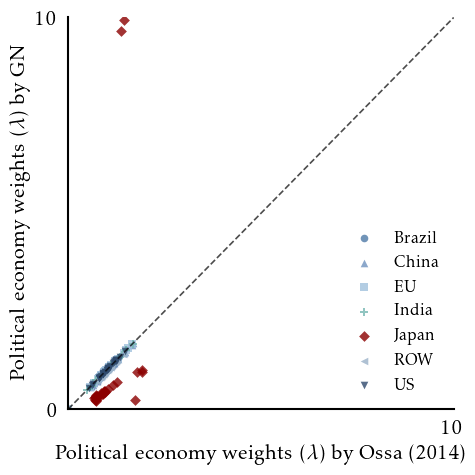

In [7]:
### Figures
# Political economy weights comparison by methods

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 12,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15
})


lam_ossa = pd.read_csv('04_output/lambda_ossa.csv', header=None)
lam_gn = pd.read_csv('04_output/lambda_gn.csv', header=None)

n_country, n_ind = lam_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

# Flatten values
l_ossa_vals = lam_ossa.values.flatten()
l_gn_vals = lam_gn.values.flatten()

country_idx = np.repeat(np.arange(n_country), n_ind)

markers = ['o', '^', 's', 'P', 'D', '<', 'v']
colors = [
    "#4E79A7",  # Brazil  
    "#7092BE",  # China   
    "#A0C1DD",  # EU      
    "#76B7B2",  # India   
    "#8B0000",  # Japan   
    "#9BB2C9",  # ROW     
    "#2F4A6D"   # US     
]

marker_sizes = [30, 30, 30, 30, 30, 30, 30] 

fig, ax = plt.subplots(figsize=(5, 5))

# Scatter
for c in range(n_country):
    mask = (country_idx == c)
    x = l_ossa_vals[mask]
    y = l_gn_vals[mask]
    ax.scatter(
        x, y,
        alpha=0.8,
        color=colors[c],
        marker=markers[c],
        s=marker_sizes[c],
        label=countries[c],
        edgecolors='white',
        linewidths=0.0
    )

xx = np.linspace(0, 10, 200)
ax.plot(xx, xx, linestyle='--', linewidth=1.2, color='black', alpha=0.7)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# ticks only at 0 and 10
ax.set_xticks([0, 10])
ax.set_yticks([0, 10])
ax.set_xticklabels(["", "10"])
ax.set_yticklabels(["0", "10"])

ax.set_xlabel("Political economy weights ($\\lambda$) by Ossa (2014)")
ax.set_ylabel("Political economy weights ($\\lambda$) by GN")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(width=0)

ax.legend(frameon=False, loc='best')
plt.tight_layout()
plt.savefig("06_figures/fig_lam_comparison.pdf", dpi=500, bbox_inches='tight')
plt.show()


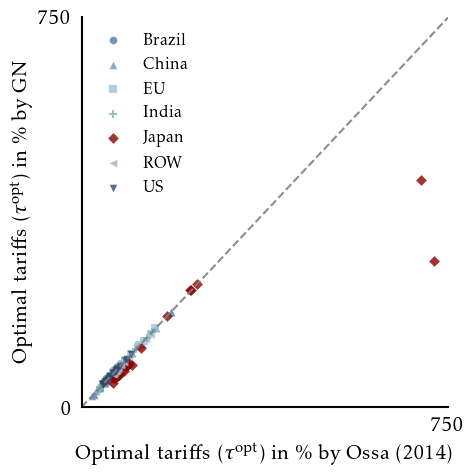

In [8]:
# Optimal tariffs comparison by methods

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 12,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15
})

t_ossa = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
t_gn   = pd.read_csv('04_output/optimal_tariff_gn.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

# percent scale
t_ossa_vals = (t_ossa.values * 100).flatten()
t_gn_vals   = (t_gn.values   * 100).flatten()

country_idx = np.repeat(np.arange(n_country), n_ind)

markers = ['o', '^', 's', 'P', 'D', '<', 'v']
colors = [
    "#4E79A7",  # Brazil  
    "#7092BE",  # China   
    "#A0C1DD",  # EU      
    "#76B7B2",  # India   
    "#8B0000",  # Japan   
    "#9BB2C9",  # ROW     
    "#2F4A6D"   # US     
]

marker_sizes = [30, 30, 30, 30, 30, 30, 30] 

fig, ax = plt.subplots(figsize=(5, 5))

# scatter
for c in range(n_country):
    mask = (country_idx == c)
    ax.scatter(
        t_ossa_vals[mask], t_gn_vals[mask],
        alpha=0.8,
        color=colors[c],
        marker=markers[c],
        s=marker_sizes[c],
        label=countries[c],
        edgecolors='white',
        linewidths=0.0
    )

xx = np.linspace(0, 750, 300)
ax.plot(xx, xx, '--', color='gray', linewidth=1.5, alpha=0.9)

# axis range
ax.set_xlim(0, 750)
ax.set_ylim(0, 750)

# ticks only at 0 and 750
ax.set_xticks([0, 750])
ax.set_yticks([0, 750])
ax.set_xticklabels(["", "750"])
ax.set_yticklabels(["0", "750"])

ax.set_xlabel("Optimal tariffs ($\\tau^{\\text{opt}}$) in \\% by Ossa (2014)")
ax.set_ylabel("Optimal tariffs ($\\tau^{\\text{opt}}$) in \\% by GN")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(width=0)

ax.legend(frameon=False, loc='best')
plt.tight_layout()
plt.savefig("06_figures/fig_tariff_comparison.pdf", dpi=500, bbox_inches='tight')
plt.show()


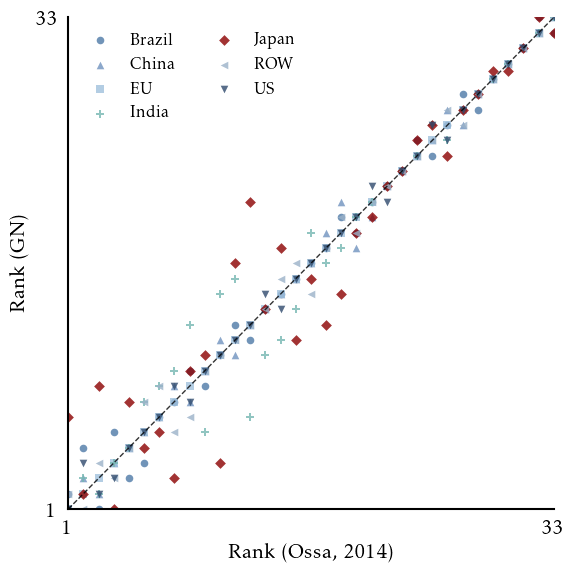

In [9]:
# Optimal tariffs rank

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 12,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15
})

t_ossa = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
t_gn   = pd.read_csv('04_output/optimal_tariff_gn.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, ax = plt.subplots(figsize=(6, 6))

markers = ['o', '^', 's', 'P', 'D', '<', 'v']
colors = [
    "#4E79A7",  # Brazil  
    "#7092BE",  # China   
    "#A0C1DD",  # EU      
    "#76B7B2",  # India   
    "#8B0000",  # Japan   
    "#9BB2C9",  # ROW     
    "#2F4A6D"   # US     
]

marker_sizes = [30, 30, 30, 30, 30, 30, 30] 

for c in range(n_country):
    r1 = t_ossa.iloc[c, :].rank(ascending=True)   
    r2 = t_gn.iloc[c, :].rank(ascending=True)     

    ax.scatter(
        r1, r2,
        s=30,
        alpha=0.8,
        color=colors[c],
        marker=markers[c],
        label=countries[c],
        edgecolors="white",
        linewidths=0.0
    )

xx = np.linspace(1, n_ind, 200)
ax.plot(xx, xx, '--', color='black', linewidth=1, alpha=0.8)

ax.set_xlim(1, n_ind)
ax.set_ylim(1, n_ind)
ax.set_xticks([1, n_ind])
ax.set_yticks([1, n_ind])
ax.set_xlabel("Rank (Ossa, 2014)")
ax.set_ylabel("Rank (GN)")

ax.legend(frameon=False, loc='upper left', ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(width=0)


plt.tight_layout()
plt.savefig("06_figures/fig_rank_comparison.pdf", dpi=500, bbox_inches='tight')
plt.show()


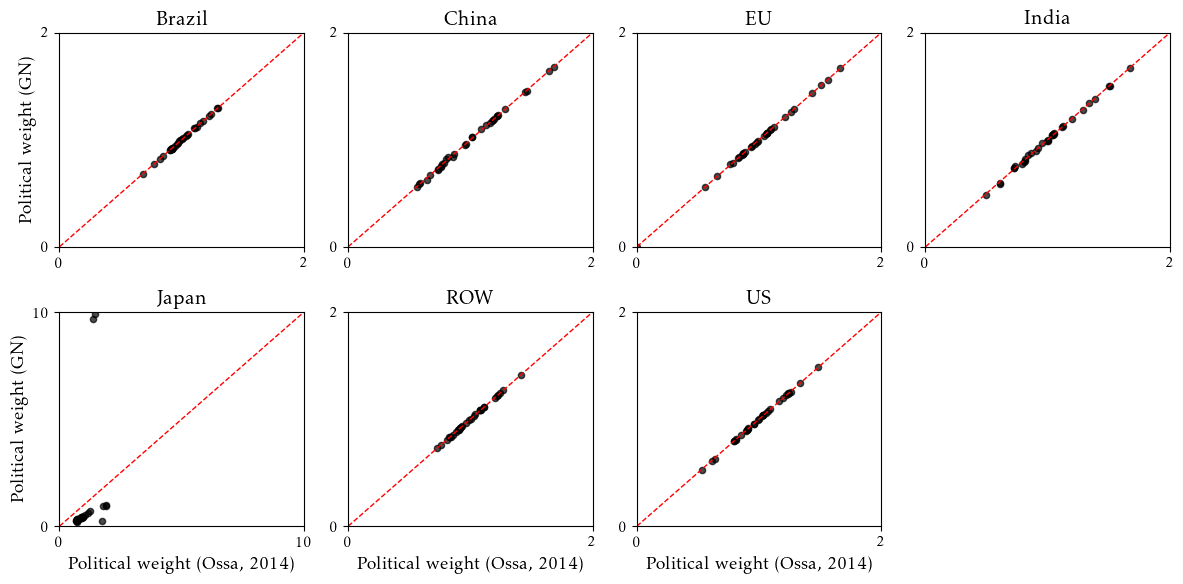

In [10]:
# Political economy weights comparison by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

lam_ossa = pd.read_csv('04_output/lambda_ossa.csv', header=None)
lam_gn   = pd.read_csv('04_output/lambda_gn.csv',   header=None)

n_country, n_ind = lam_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

lam_ossa_vals = lam_ossa.values.flatten()
lam_gn_vals   = lam_gn.values.flatten()

country_idx = np.repeat(np.arange(n_country), n_ind)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    x = lam_ossa.iloc[c, :].values
    y = lam_gn.iloc[c, :].values

    panel_max = max(x.max(), y.max())
    panel_max = np.ceil(panel_max)

    ax.scatter(x, y, color='black', s=20, alpha=0.7)

    xx = np.linspace(0, panel_max, 100)
    ax.plot(xx, xx, '--', color='red', linewidth=1)

    ax.set_title(countries[c])

    ax.set_xlim(0, panel_max)
    ax.set_ylim(0, panel_max)

    ax.set_xticks([0, panel_max])
    ax.set_yticks([0, panel_max])

    if c % 4 == 0:
        ax.set_ylabel("Political weight (GN)")
    if c >= 4:
        ax.set_xlabel("Political weight (Ossa, 2014)")

for k in range(n_country, len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("06_figures/fig_lambda_comparison_by_country.pdf", dpi=500, bbox_inches='tight')
plt.show()


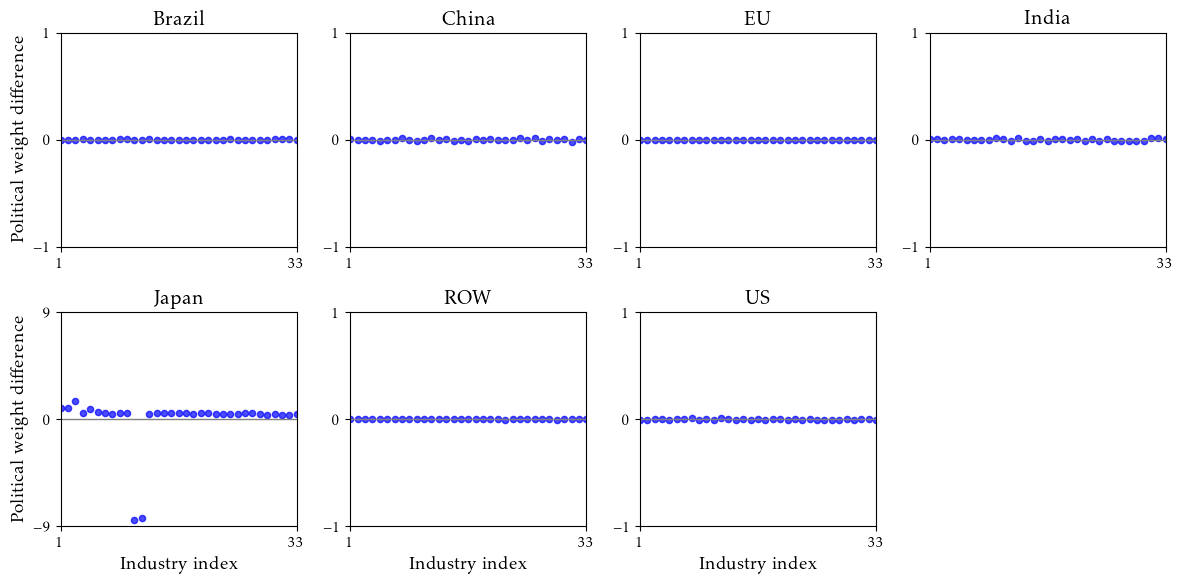

In [11]:
# Political economy weights difference by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

lam_ossa = pd.read_csv('04_output/lambda_ossa.csv', header=None)
lam_gn   = pd.read_csv('04_output/lambda_gn.csv',   header=None)

n_country, n_ind = lam_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    ossa_vals = lam_ossa.iloc[c, :].values
    gn_vals   = lam_gn.iloc[c, :].values

    diff = ossa_vals - gn_vals

    # baseline
    ax.axhline(0, color='gray', linewidth=1)

    ax.scatter(
        np.arange(1, n_ind+1),
        diff,
        color='blue',
        s=20,
        alpha=0.7
    )

    ax.set_title(countries[c])

    ax.set_xlim(1, n_ind)
    ax.set_xticks([1, n_ind])

    diff_max = np.max(np.abs(diff))
    y_lim = np.ceil(diff_max)       

    ax.set_ylim(-y_lim, y_lim)
    ax.set_yticks([-y_lim, 0, y_lim])

    if c % 4 == 0:
        ax.set_ylabel("Political weight difference")
    if c >= 4:
        ax.set_xlabel("Industry index")

for k in range(n_country, len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("06_figures/fig_lambda_difference_by_country.pdf", dpi=500, bbox_inches='tight')
plt.show()


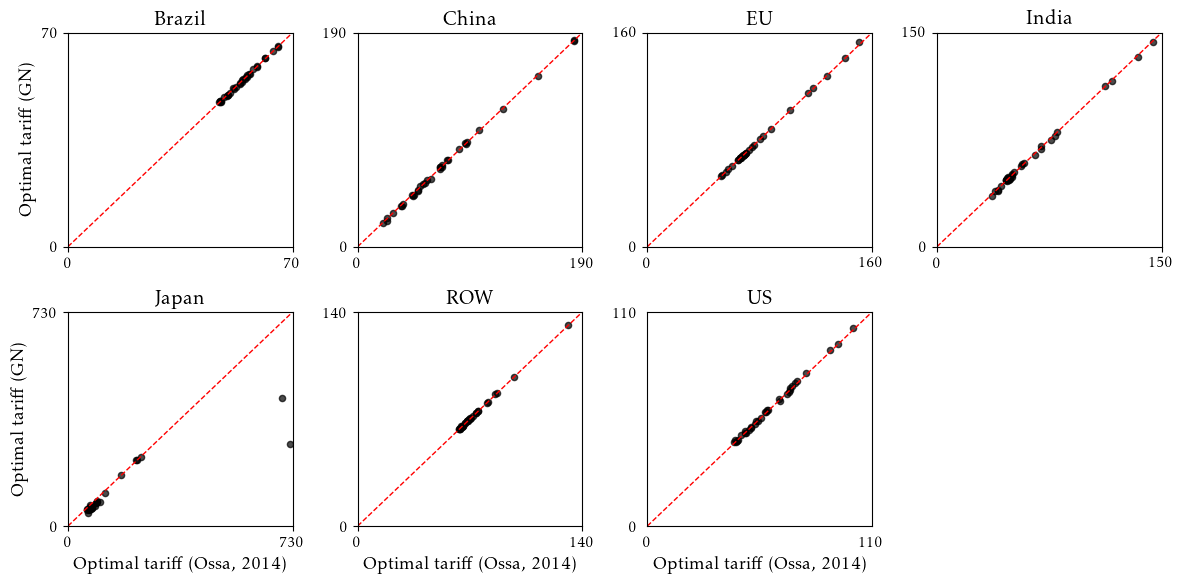

In [12]:
# Optimal tariffs comparison by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

t_ossa = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
t_gn   = pd.read_csv('04_output/optimal_tariff_gn.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

# percent scale
t_ossa_vals = (t_ossa.values * 100).flatten()
t_gn_vals   = (t_gn.values   * 100).flatten()

country_idx = np.repeat(np.arange(n_country), n_ind)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    x = t_ossa.iloc[c, :].values * 100
    y = t_gn.iloc[c, :].values * 100

    # each panel's max value
    panel_max = max(x.max(), y.max())
    panel_max = np.ceil(panel_max / 10) * 10   # round up to nearest 10

    ax.scatter(x, y, color='black', s=20, alpha=0.7)

    xx = np.linspace(0, panel_max, 100)
    ax.plot(xx, xx, '--', color='red', linewidth=1)

    ax.set_title(countries[c])

    ax.set_xlim(0, panel_max)
    ax.set_ylim(0, panel_max)

    ax.set_xticks([0, panel_max])
    ax.set_yticks([0, panel_max])

    if c % 4 == 0:
        ax.set_ylabel("Optimal tariff (GN)")
    if c >= 4:
        ax.set_xlabel("Optimal tariff (Ossa, 2014)")

for k in range(n_country, len(axes)):
    axes[k].set_visible(False)

ax.tick_params(width=0)

plt.tight_layout()
plt.savefig("06_figures/fig_tariff_comparison_by_country.pdf", dpi=500, bbox_inches='tight')
plt.show()


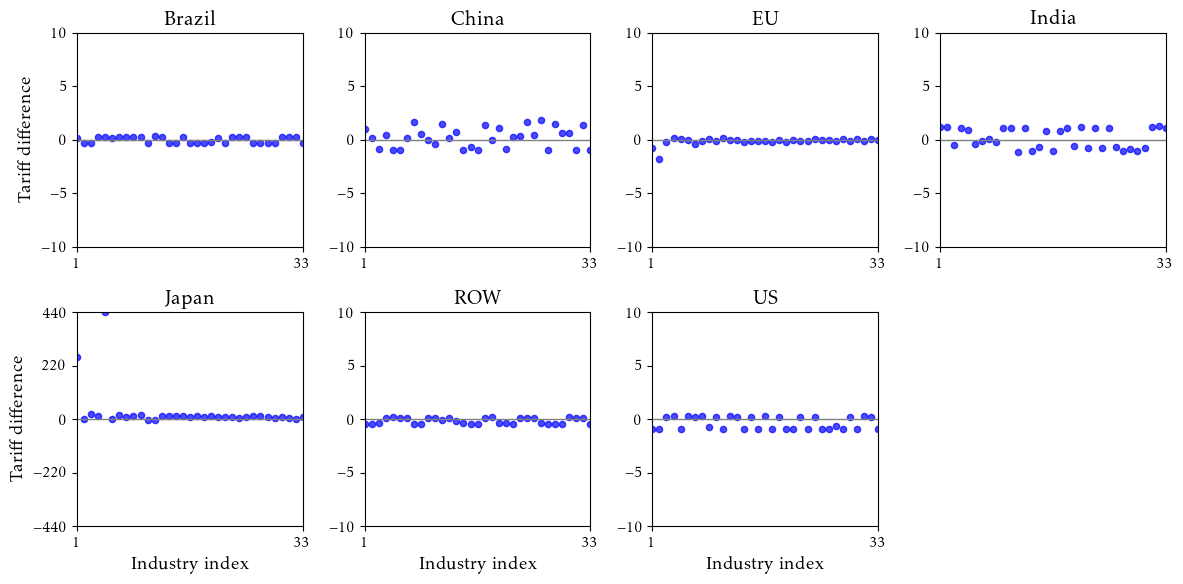

In [13]:
# Optimal tariffs difference by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

t_ossa = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
t_gn   = pd.read_csv('04_output/optimal_tariff_gn.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    # tariffs in %
    ossa_vals = t_ossa.iloc[c, :].values * 100
    gn_vals   = t_gn.iloc[c, :].values * 100

    diff = ossa_vals - gn_vals

    ax.axhline(0, color='gray', linewidth=1)

    ax.scatter(
        np.arange(1, n_ind+1),
        diff,
        color='blue',
        s=20,
        alpha=0.7
    )

    ax.set_title(countries[c])

    ax.set_xlim(1, n_ind)
    ax.set_xticks([1, n_ind])

    diff_max = np.max(np.abs(diff))
    y_lim = max(10, np.ceil(diff_max / 10) * 10)  # round up to nearest 10

    ax.set_ylim(-y_lim, y_lim)
    ax.set_yticks([-y_lim, -y_lim/2, 0, y_lim/2, y_lim])

    if c % 4 == 0:
        ax.set_ylabel("Tariff difference")
    if c >= 4:
        ax.set_xlabel("Industry index")

for k in range(n_country, len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("06_figures/fig_tariff_difference_by_country.pdf", dpi=500, bbox_inches='tight')
plt.show()


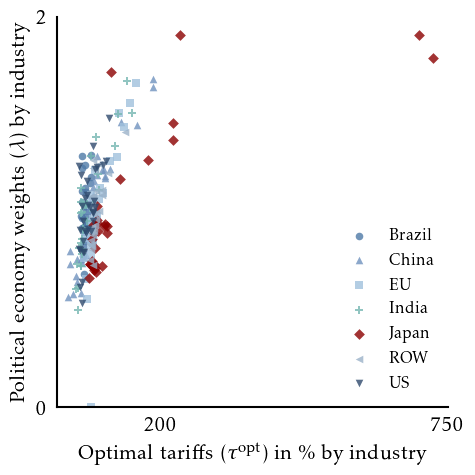

In [ ]:
# Optimal tariffs and political economy weights (Original codes)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 12,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15
})

tariff = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
lam = pd.read_csv('04_output/lambda_ossa.csv', header=None)

n_country, n_ind = tariff.shape

# Country names
countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

# Multiply tariff by 100 for %
t_vals = (tariff.values * 100).flatten()
l_vals = lam.values.flatten()

country_idx = np.repeat(np.arange(n_country), n_ind)

# markers and colors
markers = ['o', '^', 's', 'P', 'D', '<', 'v']
colors = [
    "#4E79A7",  # Brazil  
    "#7092BE",  # China   
    "#A0C1DD",  # EU      
    "#76B7B2",  # India   
    "#8B0000",  # Japan   
    "#9BB2C9",  # ROW     
    "#2F4A6D"   # US     
]

marker_sizes = [30, 30, 30, 30, 30, 30, 30] 

fig, ax = plt.subplots(figsize=(5, 5))

# Scatter + fitted line per country
for c in range(n_country):
    mask = (country_idx == c)
    x = t_vals[mask]
    y = l_vals[mask]
    ax.scatter(x, y, alpha=0.8, color=colors[c], marker=markers[c], 
               s=marker_sizes[c], label=countries[c], edgecolors='white', linewidths=0.0)
    
ax.set_xlim(0, 750)
ax.set_ylim(0, 2)

# ticks only at 0 and 10
ax.set_xticks([0, 200, 750])
ax.set_yticks([0, 2])
ax.set_xticklabels(["", "200", "750"])
ax.set_yticklabels(["0", "2"])


ax.set_xlabel("Optimal tariffs ($\\tau^{\\text{opt}}$) in \% by industry")
ax.set_ylabel("Political economy weights ($\\lambda$) by industry")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(width=0)

ax.legend(frameon=False, loc='best')
plt.tight_layout()
plt.savefig("06_figures/fig_ossa_lam_tariff.pdf", dpi=500, bbox_inches='tight')
plt.show()

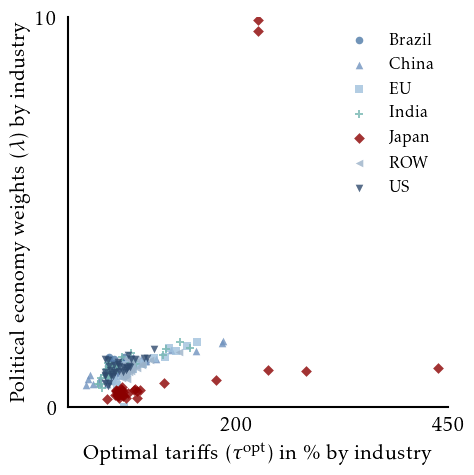

In [6]:
## Optimal tariffs and political economy weights (GN)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 12,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15
})

tariff = pd.read_csv('04_output/optimal_tariff_gn.csv', header=None)
lam = pd.read_csv('04_output/lambda_gn.csv', header=None)

n_country, n_ind = tariff.shape

# Country names
countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

# Multiply tariff by 100 for %
t_vals = (tariff.values * 100).flatten()
l_vals = lam.values.flatten()

country_idx = np.repeat(np.arange(n_country), n_ind)

# markers and colors
markers = ['o', '^', 's', 'P', 'D', '<', 'v']
colors = [
    "#4E79A7",  # Brazil  
    "#7092BE",  # China   
    "#A0C1DD",  # EU      
    "#76B7B2",  # India   
    "#8B0000",  # Japan   
    "#9BB2C9",  # ROW     
    "#2F4A6D"   # US     
]

marker_sizes = [30, 30, 30, 30, 30, 30, 30] 

fig, ax = plt.subplots(figsize=(5, 5))

# Scatter + fitted line per country
for c in range(n_country):
    mask = (country_idx == c)
    x = t_vals[mask]
    y = l_vals[mask]
    ax.scatter(x, y, alpha=0.8, color=colors[c], marker=markers[c], 
               s=marker_sizes[c], label=countries[c], edgecolors='white', linewidths=0.0)
    
ax.set_xlim(0, 450)
ax.set_ylim(0, 10)

# ticks only at 0 and 10
ax.set_xticks([0, 200, 450])
ax.set_yticks([0, 10])
ax.set_xticklabels(["", "200", "450"])
ax.set_yticklabels(["0", "10"])


ax.set_xlabel("Optimal tariffs ($\\tau^{\\text{opt}}$) in \% by industry")
ax.set_ylabel("Political economy weights ($\\lambda$) by industry")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(width=0)

ax.legend(frameon=False, loc='best')
plt.tight_layout()
plt.savefig("06_figures/fig_gn_lam_tariff.pdf", dpi=500, bbox_inches='tight')
plt.show()

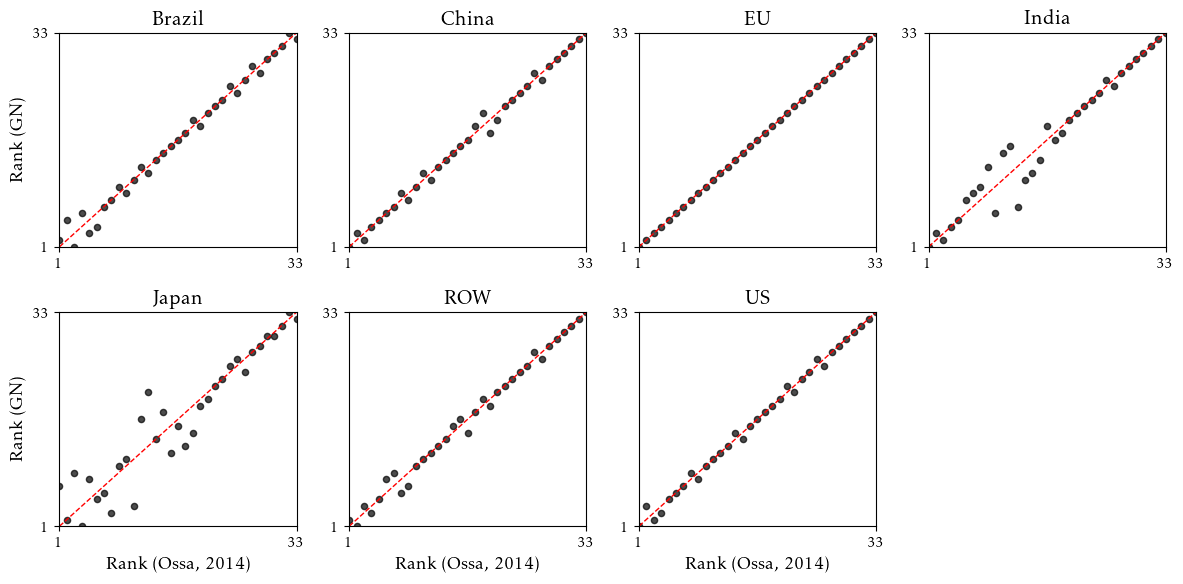

In [14]:
# Rank comparison by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

t_ossa = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
t_gn   = pd.read_csv('04_output/optimal_tariff_gn.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    r1 = t_ossa.iloc[c, :].rank(ascending=True)
    r2 = t_gn.iloc[c, :].rank(ascending=True)

    ax.scatter(r1, r2, alpha=0.7, color='black', s=20)

    # 45-degree line
    xx = np.linspace(1, n_ind, 100)
    ax.plot(xx, xx, '--', color='red', linewidth=1)

    ax.set_title(countries[c])
    ax.set_xlim(1, n_ind)
    ax.set_ylim(1, n_ind)
    ax.set_xticks([1, n_ind])
    ax.set_yticks([1, n_ind])

    if c % 4 == 0:
        ax.set_ylabel("Rank (GN)")
    if c >= 4:
        ax.set_xlabel("Rank (Ossa, 2014)")

if n_country < len(axes):
    for k in range(n_country, len(axes)):
        axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("06_figures/fig_rank_comparison_by_country.pdf", dpi=500, bbox_inches='tight')
plt.show()


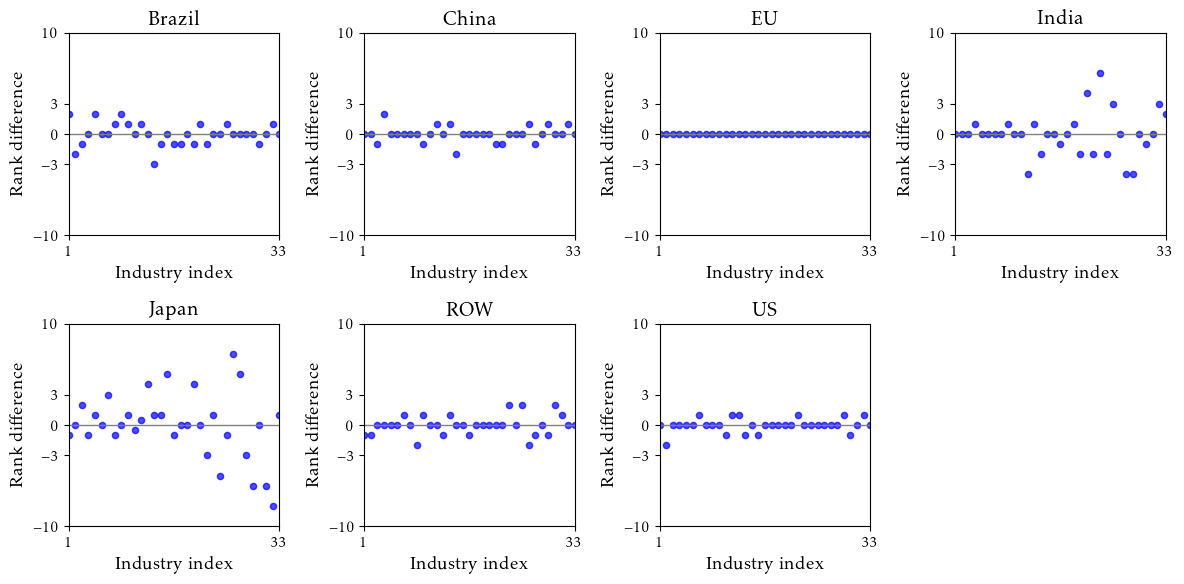

In [15]:
# Rank difference by methods (country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["kpfonts"], 
    "text.latex.preamble": r"""
        \usepackage[T1]{fontenc}
        \usepackage{kpfonts}
        \usepackage{amsmath,amssymb}
    """,
    "axes.labelsize": 13,
    "font.size": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

t_ossa = pd.read_csv('04_output/optimal_tariff_ossa.csv', header=None)
t_gn   = pd.read_csv('04_output/optimal_tariff_gn.csv',   header=None)

n_country, n_ind = t_ossa.shape

countries = ["Brazil", "China", "EU", "India", "Japan", "ROW", "US"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for c in range(n_country):
    ax = axes[c]

    r1 = t_ossa.iloc[c, :].rank(ascending=True)
    r2 = t_gn.iloc[c, :].rank(ascending=True)
    diff = r1 - r2

    ax.axhline(0, color='gray', linewidth=1)

    ax.scatter(
        range(1, n_ind+1), diff,
        color='blue', s=20, alpha=0.7
    )

    ax.set_title(countries[c])

    ax.set_xlim(1, n_ind)
    ax.set_xticks([1, n_ind])

    ax.set_ylim(-10, 10)
    ax.set_yticks([-10, -3, 0, 3, 10])

    ax.set_ylabel("Rank difference")
    ax.set_xlabel("Industry index")

if n_country < len(axes):
    for k in range(n_country, len(axes)):
        axes[k].set_visible(False)

plt.tight_layout()
plt.savefig("06_figures/fig_rank_difference_by_country.pdf", dpi=500, bbox_inches='tight')
plt.show()

